In [2]:
import os
import sys
import re
from collections import OrderedDict

In [16]:
#2018-10-28 00:24:19,407 - Total sparsity: 19.39
#2018-10-28 00:24:20,573 - ==> Top1: 44.410    Top5: 92.320    Loss: 1.512

fname = './filter_MAC_41.58-Top1_90.4/2018.11.02-195132.log'
with open(fname) as fp:  
    for cnt, line in enumerate(fp):
        #print("Line {}: {}".format(cnt, line))
        pattern1 = re.compile(r"(\S+) (\S+) - Total sparsity: (\d+.\d+)")
        match1 = pattern1.match(line)
        if match1:
            ser_date, ser_no, sparsity_str = match1.groups()
            #print('{:s}'.format(sparsity_str))
        
        pattern2 = re.compile(r"(\S+) (\S+) - ==> Top1: (\d+.\d+)    Top5: (\d+.\d+)    Loss: (\d+.\d+)")
        match2 = pattern2.match(line)
        if match2:
            ser_date, ser_no, top1_str, top5_str, loss_str = match2.groups()
            #print('{:s}, {:s}, {:s}, {:s}'.format(sparsity_str, top1_str, top5_str, loss_str))


In [17]:
dictionary_best_top1 = OrderedDict()
dictionary_top1 = OrderedDict()
dictionary_top5 = OrderedDict()
dictionary_loss = OrderedDict()

#2018-10-28 00:24:20,573 - ==> Top1: 44.410    Top5: 92.320    Loss: 1.512
#2018-11-02 21:14:39,381 - ==> Best Top1: 43.020   On Epoch: 0

fname = './filter_MAC_41.58-Top1_90.4/2018.11.02-195132.log'
with open(fname) as fp:  
    i = 0
    for cnt, line in enumerate(fp):
        #print("Line {}: {}".format(cnt, line))
        pattern1 = re.compile(r"(\S+) (\S+) - ==> Top1: (\d+.\d+)    Top5: (\d+.\d+)    Loss: (\d+.\d+)")
        match1 = pattern1.match(line)
        if match1:
            ser_date, ser_no, top1_str, top5_str, loss_str = match1.groups()
        
        pattern2 = re.compile(r"(\S+) (\S+) - ==> Best Top1: (\d+.\d+)   On Epoch: (\d+)")
        match2 = pattern2.match(line)
        if match2:
            ser_date, ser_no, best_top1_str, epoch_str = match2.groups()
            #print('{:s}, {:s}, {:s}, {:s}'.format(epoch_str, best_top1_str, top1_str, top5_str, loss_str))

            best_top1 = float(best_top1_str)
            top1 = float(top1_str)
            top5 = float(top5_str)
            loss = float(loss_str)
                        
            i += 1
            dictionary_best_top1[i] = best_top1
            dictionary_top1[i] = top1
            dictionary_top5[i] = top5
            dictionary_loss[i] = loss
            
print(dictionary_best_top1)
print(dictionary_top1)
#print(dictionary_top5)
#print(dictionary_loss)


OrderedDict([(1, 43.02), (2, 56.81), (3, 62.23), (4, 70.4), (5, 70.4), (6, 70.4), (7, 72.35), (8, 75.28), (9, 75.29), (10, 77.73), (11, 77.73), (12, 77.73), (13, 77.73), (14, 79.8), (15, 81.83), (16, 81.83), (17, 81.83), (18, 81.83), (19, 81.83), (20, 81.83), (21, 81.83), (22, 82.47), (23, 82.47), (24, 82.47), (25, 82.47), (26, 82.47), (27, 82.47), (28, 82.47), (29, 82.47), (30, 82.48), (31, 82.48), (32, 82.48), (33, 82.48), (34, 82.48), (35, 82.48), (36, 82.48), (37, 82.48), (38, 84.26), (39, 84.26), (40, 84.26), (41, 84.26), (42, 84.26), (43, 84.26), (44, 84.26), (45, 84.26), (46, 84.26), (47, 84.26), (48, 84.26), (49, 84.26), (50, 84.26), (51, 84.26), (52, 84.26), (53, 84.26), (54, 84.26), (55, 84.26), (56, 84.26), (57, 84.26), (58, 84.26), (59, 84.26), (60, 84.26), (61, 84.26), (62, 84.26), (63, 84.26), (64, 84.26), (65, 84.26), (66, 84.26), (67, 84.88), (68, 84.88), (69, 84.88), (70, 85.23), (71, 85.23), (72, 85.23), (73, 85.23), (74, 85.23), (75, 85.56), (76, 85.56), (77, 85.56),

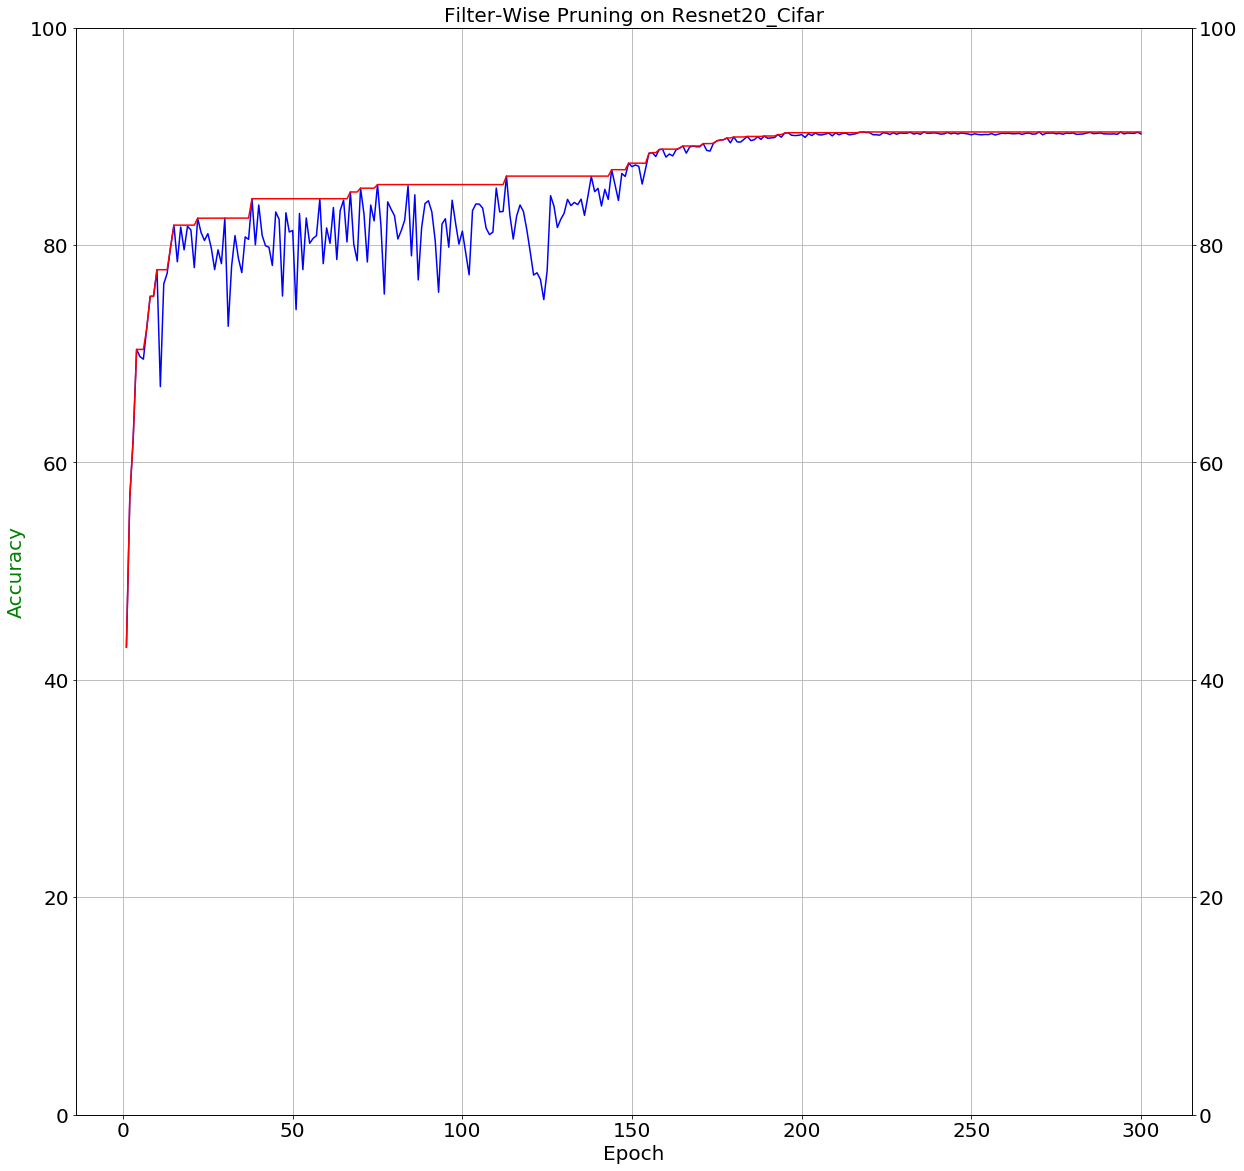

In [19]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

fig.set_figheight(20)
fig.set_figwidth(20)

ax1.set_title('Filter-Wise Pruning on Resnet20_Cifar', fontsize=20)

ax2 = ax1.twinx()
ax2.figure.figsize=(120,120)

ax1.plot(list(dictionary_top1.keys()), list(dictionary_top1.values()),'b-')
ax2.plot(list(dictionary_best_top1.keys()), list(dictionary_best_top1.values()), 'r-')

ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='y', which='major', labelsize=20)

ax1.set_xlabel('Epoch', fontsize=20)
ax1.set_ylabel('Accuracy', fontsize=20, color='g')

ax1.set(ylim=[0, 100])
ax2.set(ylim=[0, 100])

ax1.grid()
plt.show()